In [47]:
from importlib import reload

import DataProvider
import Utils

reload(DataProvider)
reload(Utils)

<module 'Utils' from '/home/vincent/vincent/sharedwork/data/market-hedging/Utils.py'>

In [43]:
start_date = "2013-10-01"
end_date = "2018-10-01"

ref_name = "SPY"

df = DataProvider.get_random_securities(10, start_date, end_date)
df_ref = DataProvider.get_securities(ref_name, start_date, end_date)

df = Utils.attach_return(df, "symbol")
df_ref = Utils.attach_return(df_ref, "symbol")

In [44]:
df0 = df.reset_index().merge(
    df_ref.reset_index().drop("symbol", axis=1),
    on="date",
    suffixes=["", "_ref"]
).dropna().set_index(df.index.names)

In [50]:
%time
df = Utils.attach_beta(df0, "return_ref", "return", "symbol", 15, numpy=False)

CPU times: user 7 µs, sys: 1e+03 ns, total: 8 µs
Wall time: 13.4 µs


In [51]:
%time
df = Utils.attach_beta(df0, "return_ref", "return", "symbol", 15, numpy=True)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.25 µs


In [36]:
df.head(10)

,,adjClose,return,adjClose_ref,return_ref,beta
symbol,date,,,,,
CRCM,2017-02-07,9.340000,0.104019,221.683574,0.000044,0.000000
KFRC,2017-02-07,20.621284,-0.038288,221.683574,0.000044,0.000000
TRV,2017-02-07,113.155718,0.000765,221.683574,0.000044,0.000000
VDTH,2017-02-07,9.460000,-0.002110,221.683574,0.000044,0.000000
VRTS,2017-02-07,106.758671,0.010176,221.683574,0.000044,0.000000
UZV,2017-02-08,18.750000,0.005362,221.974065,0.001310,0.000000
CRCM,2017-02-08,9.830000,0.052463,221.974065,0.001310,-40.701161
KFRC,2017-02-08,23.374009,0.133489,221.974065,0.001310,135.609853
TRV,2017-02-08,113.203763,0.000425,221.974065,0.001310,-0.268617


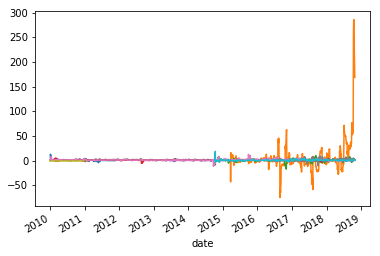

In [7]:
p = df.reset_index("symbol").groupby("symbol")["beta"].plot()